In [2]:
import pandas as pd

In [19]:
df=pd.read_csv('./DATA/교통 관련 CCTV 개수,  설치된 CCTV 지역의 사고 건수 분석3.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사망자수(명)   125 non-null    int64  
 1   심각정도      125 non-null    object 
 2   발생건수(건)   125 non-null    int64  
 3   부상자수(명)   125 non-null    int64  
 4   사고당사망률    125 non-null    float64
 5   사고당부상률    125 non-null    float64
 6   CCTV설치대수  125 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 7.0+ KB


In [21]:
df.isna().sum()

사망자수(명)     0
심각정도        0
발생건수(건)     0
부상자수(명)     0
사고당사망률      0
사고당부상률      0
CCTV설치대수    0
dtype: int64

In [22]:
df.head()

,사망자수(명),심각정도,발생건수(건),부상자수(명),사고당사망률,사고당부상률,CCTV설치대수
0,5,낮음,903,1224,0.0055,1.3555,231
1,6,낮음,955,1248,0.0063,1.3068,352
2,12,보통,890,1178,0.0135,1.3236,625
3,9,보통,1119,1481,0.0080,1.3235,386
4,4,낮음,869,1145,0.0046,1.3176,194


In [29]:
df.describe()

,사망자수(명),발생건수(건),부상자수(명),사고당사망률,사고당부상률,CCTV설치대수
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,8.600000,1360.912000,1822.448000,0.006902,1.333121,491.840000
std,3.941099,671.770242,927.933304,0.003251,0.055204,273.038855
min,2.000000,522.000000,671.000000,0.001600,1.191400,31.000000
25%,6.000000,943.000000,1236.000000,0.004400,1.295400,304.000000
50%,8.000000,1221.000000,1606.000000,0.006300,1.342100,431.000000
75%,11.000000,1444.000000,1906.000000,0.009000,1.364900,614.000000
max,20.000000,3926.000000,5229.000000,0.019300,1.530900,1352.000000


In [23]:
df.columns

Index(['사망자수(명)', '심각정도', '발생건수(건)', '부상자수(명)', '사고당사망률', '사고당부상률',
       'CCTV설치대수'],
      dtype='object')

In [27]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
plt.rcParams['axes.unicode_minus'] = False

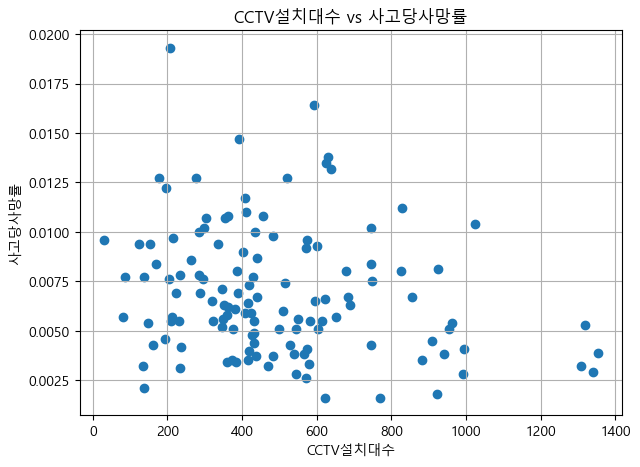

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(df['CCTV설치대수'], df['사고당사망률'])

plt.xlabel('CCTV설치대수')
plt.ylabel('사고당사망률')
plt.title('CCTV설치대수 vs 사고당사망률')

plt.grid(True)
plt.show()

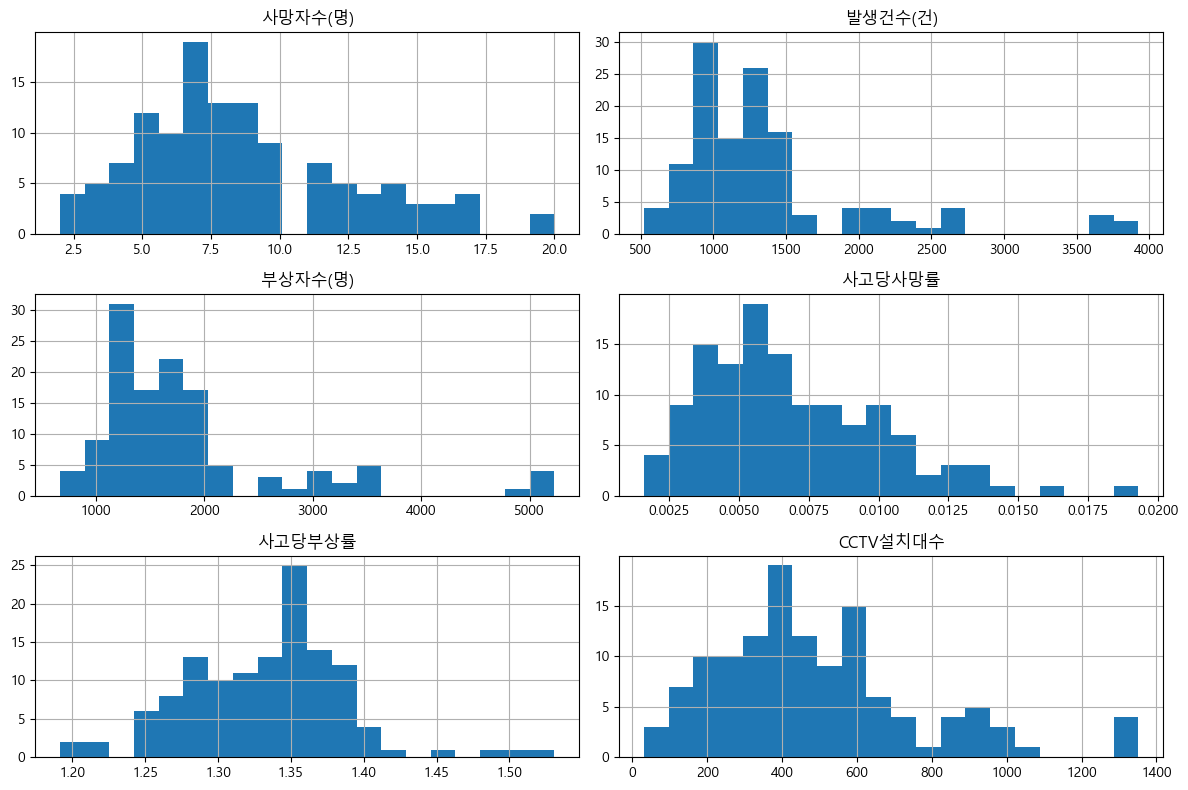

In [30]:
num_cols = [
    '사망자수(명)', '발생건수(건)', '부상자수(명)',
    '사고당사망률', '사고당부상률', 'CCTV설치대수'
]

df[num_cols].hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

In [34]:
import seaborn as sns

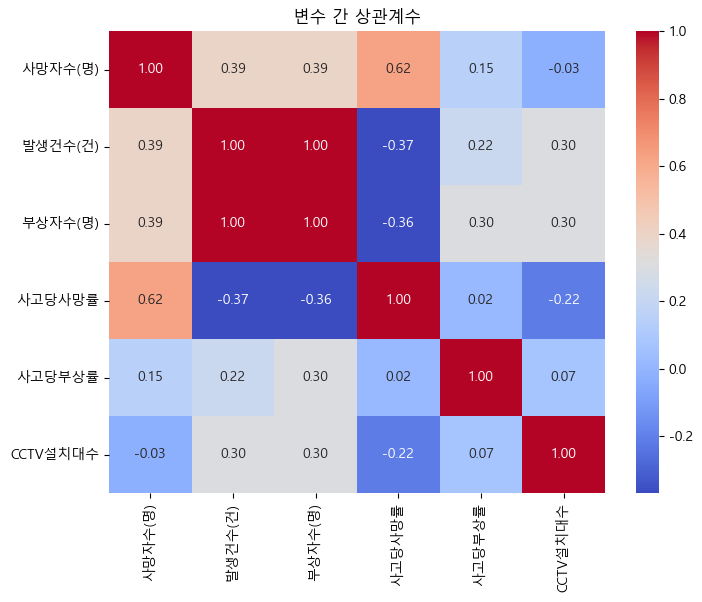

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[num_cols].corr(),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("변수 간 상관계수")
plt.show()

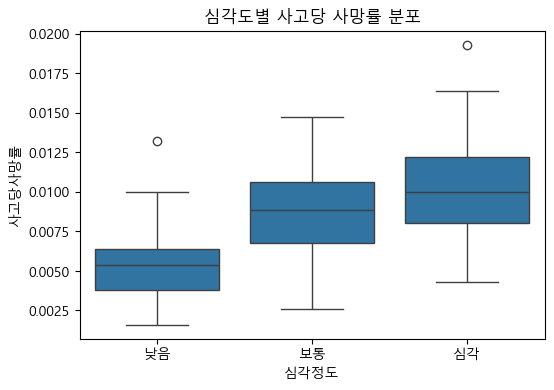

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='심각정도',
    y='사고당사망률',
    data=df,
    order=['낮음','보통','심각']
)
plt.title('심각도별 사고당 사망률 분포')
plt.show()

In [37]:
X = df[
    ['발생건수(건)', '부상자수(명)', '사고당사망률', '사고당부상률', 'CCTV설치대수']
]

y = df['심각정도']

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

# 확인
print(le.classes_)  

['낮음' '보통' '심각']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pipe.predict(X_test)

print("정확도:", pipe.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

정확도: 0.84
              precision    recall  f1-score   support

          낮음       0.93      0.93      0.93        14
          보통       0.73      0.89      0.80         9
          심각       0.00      0.00      0.00         2

    accuracy                           0.84        25
   macro avg       0.55      0.61      0.58        25
weighted avg       0.78      0.84      0.81        25

[[13  1  0]
 [ 1  8  0]
 [ 0  2  0]]


c:\Users\User\.conda\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\.conda\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\.conda\envs\ml\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [45]:
sample = pd.DataFrame([{
    '발생건수(건)': 1500,
    '부상자수(명)': 2000,
    '사고당사망률': 0.010,
    '사고당부상률': 1.40,
    'CCTV설치대수': 300
}])

In [46]:
pred_code = pipe.predict(sample)[0]
pred_label = le.inverse_transform([pred_code])[0]

print("예측 심각정도:", pred_label)

예측 심각정도: 보통
